**Classification using PyTorch NN**

**1. NN classification model architecture** 

**2. I/P and O/P shapes of classification model**

**3. Custom dataset to view, fit and predict on**

**4. Modelling steps such as setting up loss function, optimizer, training loop and model evaluation**

**5. Saving and Loading models**

**6. Harnessing the power of non-linearity**

**7. Different classification evaluation methods**

**PyTorch default image dataset dimensions is `[batch_size, color_channels, width, height]`. However, this can be changed with code**

**Typical Model Architecture**
**Hyperparameters**

1. **`Input layer shape (in_features)`**: equal to the number of input features
2. **`Hidden Layer`**: Problem specific; min = 1, maximum = infinity
3. **`Neurons per hidden layer`**: problem specific; generally anywhere from 10 to 512
4. **`Output Layer shape (out_features)`**: equal to the number of classes
5. **`Hidden Layer Activation`**: ReLU or others
6. **`Output Activation`**: Sigmoid (torch.sigmoid)
7. **`Loss function`**: Binary or Cateogrical Cross Entropy (torch.nn.BCELoss)
8. **`Optimizer`**: SGD (Stochastic Gradient Descent) or Adam (torch.optim.Adam)

**Making a toy classification dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
import torch.nn as nn

In [2]:
#Making samples
n_samples = 1000

X, y = make_circles(n_samples = n_samples, noise = 0.03, random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
#Making a dataframe 
df1 = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})

In [8]:
df1.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


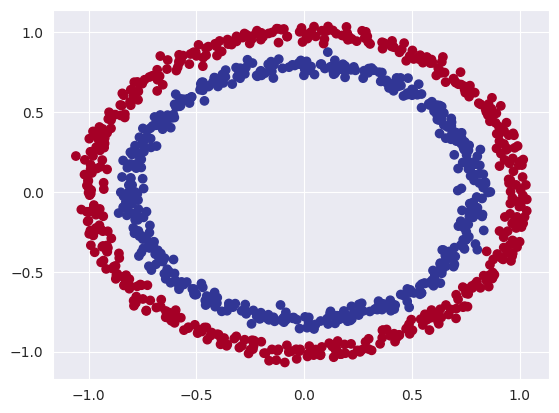

In [9]:
plt.scatter(df1['X1'], df1['X2'], c = df1['label'], cmap = plt.cm.RdYlBu)

**Converting the dataset to tensors**

In [10]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Note: torch.Tensor(X) or y can also be used but it creates a copy of the tensor, and it can convert any dtype to a tensor. While torch.from_numpy() method specifically converts a numpy ndarray to a tensor. Moreover this method saves space since the tensor and the ndarray occupy the same memory thus changing one changes the other.**

In [11]:
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [12]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [13]:
X_test

tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

In [14]:
y_train

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [15]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [16]:
len(X_train), len(y_train)

(800, 800)

**Making the code device agnostic**

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
device

'cuda'

In [19]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [20]:
X_train.device, y_train.device, y_test.device, X_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

**PyTorch NN Classification model construction**

Steps:

1. Subclass nn.Module
2. Create 2 nn.Linear layers
3. Define forward method
4. Instantiate model

In [21]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features = 2, out_features = 5) 
        self.linear_layer_2 = nn.Linear(in_features = 5, out_features = 1)# Here out_features is 1 since each (X1, X2) sample has just a single label; Similarly the in_features of succeeding layer must equal the out_features of the preceding layer
    #Forward method
    def forward(self, x): # Since we are just returning a label, the return type needn't be specified as a tensor
        return self.linear_layer_2(self.linear_layer_1(x)) # Here the flow is layer_1 -> layer_2 -> Output; So Layer_2 is performing transformation on the layer_1's output and that's why it takes in self.linear_layer_1(x) as the argument and not just x 
#Model instantiation
model_0 = BinaryClassifier().to(device)

In [22]:
model_0

BinaryClassifier(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('linear_layer_2.bias', tensor([-0.2060], device='cuda:0'))])

**Creating the same model using nn.Sequential() API**

In [24]:
model_0 = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                        nn.Linear(in_features = 5, out_features = 1)).to(device)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [26]:
#Another way of creating the same model
class BinaryClassifierTrial(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_linear_layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                                               nn.Linear(in_features = 5, out_features = 1))
    def forward(self, x):
        return self.two_linear_layers(x)
model_0_trial = BinaryClassifierTrial().to(device)

In [27]:
model_0_trial

BinaryClassifierTrial(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [28]:
model_0_trial.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([0.1379], device='cuda:0'))])

In [29]:
#Making random predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test)

In [30]:
print(f'Random Predictions: {untrained_preds}')

Random Predictions: tensor([[-3.3758e-02],
        [-3.0925e-02],
        [ 8.9392e-02],
        [-6.9192e-02],
        [ 2.9666e-01],
        [ 2.9679e-01],
        [ 1.4048e-01],
        [ 2.1776e-01],
        [ 8.0462e-02],
        [-2.8444e-02],
        [-6.2729e-02],
        [-2.0969e-02],
        [ 1.8467e-01],
        [ 1.4663e-01],
        [ 5.2323e-02],
        [ 2.3198e-01],
        [ 6.0201e-02],
        [-7.7123e-02],
        [-3.4853e-02],
        [-5.4889e-02],
        [-3.5730e-02],
        [ 2.8576e-01],
        [-2.8304e-02],
        [-8.1063e-02],
        [ 8.1167e-02],
        [ 1.7573e-01],
        [ 2.5394e-01],
        [ 3.1677e-01],
        [ 4.1465e-02],
        [ 1.7662e-01],
        [ 1.2237e-01],
        [ 6.4855e-02],
        [-6.5519e-02],
        [ 2.6689e-01],
        [-7.7007e-02],
        [ 1.1215e-02],
        [-4.3663e-02],
        [ 1.2971e-01],
        [ 2.4701e-01],
        [ 1.6160e-01],
        [-2.9177e-02],
        [ 4.7937e-02],
        [ 6.66

**Creating a Loss function and optimizer**

In [31]:
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss uses the log odds ratio and this is what feeds the data into softmax function
opt_fn = torch.optim.SGD(model_0.parameters(), lr = 0.1)

**Note: BCEWithLogitsLoss comes with inbuilt sigmoid activation function**

**Another way of getting BCE and Loss is: nn.Sequential(nn.BCELoss(), torch.sigmoid())**

**Creating Evaluation metrics**

In [32]:
#Compute Accuracy
#Creating a custom function for accuracy
# The function takes in true and predicted values as arguments
#torch.eq(value_1, value_2) is used for checking if both are equal ; then .sum() gives the sum of equal values and.item() gives total correct values
def accuracy_fn(True_value, Predicted_value):
    correct = torch.eq(True_value, Predicted_value).sum().item()
    acc = (correct / len(Predicted_value)) * 100
    return acc

**Model Training**

In [33]:
'''Steps:
1. Set the model to training mode
2. Forward pass
3. Training Loss computation
4. Resetting the optimizer
5. Backpropagation
6. Stepping the optimizer
7. Set the model to evaluation mode
8. Start inference mode
9. Forward Pass for Test Data
10. Test Loss computation
11. end'''

'Steps:\n1. Set the model to training mode\n2. Forward pass\n3. Training Loss computation\n4. Resetting the optimizer\n5. Backpropagation\n6. Stepping the optimizer\n7. Set the model to evaluation mode\n8. Start inference mode\n9. Forward Pass for Test Data\n10. Test Loss computation\n11. end'

In [34]:
# Going from raw logits -> Prediction probabilities -> Predicted Labels
#Logits have to be passed through Sigmoid activation function in this case (Binary Classification)
#Recreating the model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                                        nn.Linear(in_features = 5, out_features = 1))
    def forward(self, x):
        return self.two_layers(x)

In [35]:
model_0 = BinaryClassifier().to(device)

In [36]:
model_0

BinaryClassifier(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [37]:
#Checking the first 5 logits value
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[: 5]

In [38]:
y_logits

tensor([[-0.0477],
        [ 0.1137],
        [-0.4259],
        [ 0.0593],
        [-0.3548]], device='cuda:0')

In [39]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')

In [40]:
y_sig = torch.sigmoid(y_logits)

In [41]:
y_sig # Prediction probabilities

tensor([[0.4881],
        [0.5284],
        [0.3951],
        [0.5148],
        [0.4122]], device='cuda:0')

In [42]:
y_sig.shape, y_test.shape

(torch.Size([5, 1]), torch.Size([200]))

In [43]:
y_preds = torch.round(y_sig)

In [44]:
torch.squeeze(y_preds)

tensor([0., 1., 0., 1., 0.], device='cuda:0')

**Building a train loop**

In [45]:
#Building a training and test loop
torch.manual_seed(42)
epochs = 1000
for i in range(epochs):
    #Training Mode
    model_0.train()
    #Forward Pass
    #Logits
    train_logits = model_0(X_train).squeeze()
    #Getting Pred Labels
    train_pred = torch.round(torch.sigmoid(train_logits))
    #Loss computation
    train_loss = loss_fn(train_logits, y_train)
    #Accuracy
    train_acc = accuracy_fn(y_train, train_pred)
    #Resetting Optimizer
    opt_fn.zero_grad()
    #BackPropagation
    train_loss.backward()
    #Stepping the Optimizer
    opt_fn.step()
    #Evaluation mode
    model_0.eval()
    #inference mode
    with torch.inference_mode():
        #Forward pass
        #Logits
        test_logits = model_0(X_test).squeeze()
        #Labels
        test_pred = torch.round(torch.sigmoid(test_logits))
        #Test loss
        test_loss = loss_fn(test_logits, y_test)
        #Test Accuracy
        test_acc = accuracy_fn(y_test, test_pred)
    print(f'Epochs: {i + 1} | Train_Loss: {train_loss} | Train_Accuracy: {train_acc} % | Test_Loss: {test_loss} | Test_Accuracy: {test_acc} %')

Epochs: 1 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 2 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 3 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 4 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 5 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 6 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 7 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %
Epochs: 8 | Train_Loss: 0.702765703201294 | Train_Accuracy: 47.875 % | Test_Loss: 0.7127941846847534 | Test_Accuracy: 46.0 %


**Note: the model isn't improving at all (learning). Therefore, visualizing the predictions**

In [46]:
import requests
!wget 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

--2024-08-12 14:53:52--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py.11’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-08-12 14:53:52 (159 MB/s) - ‘helper_functions.py.11’ saved [10160/10160]



In [47]:
from helper_functions import plot_decision_boundary, plot_predictions

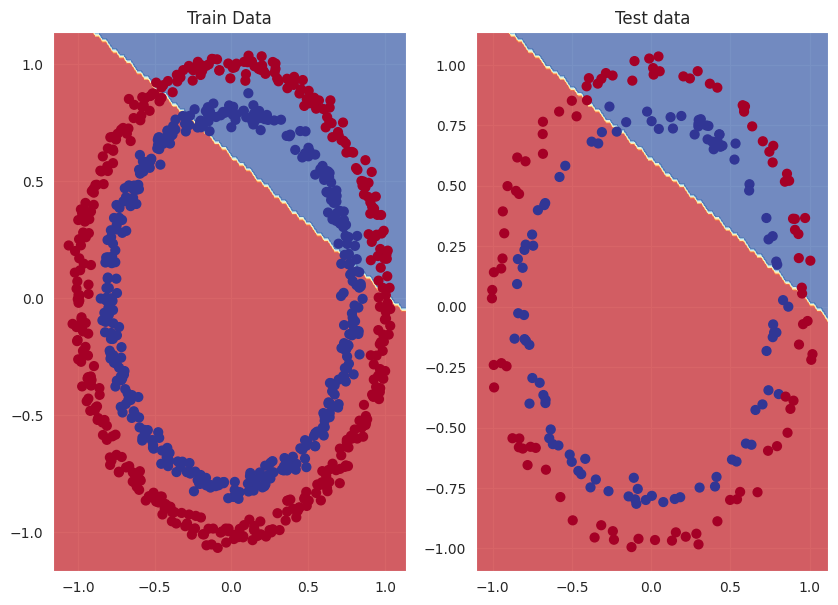

In [48]:
#Plotting the decision boundaries
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.title('Train Data')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model_0, X_test, y_test)

**Improving model predictions**

Steps:

1. Adding more layers
2. More neurons
3. Introducing non-linearity (changing activation functions)
4. Adjusting learning rate

In [49]:
'''model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
plot_decision_boundary(X_train, y_train, X_test, y_test, y_preds)'''

'model_0.eval()\nwith torch.inference_mode():\n    y_logits = model_0(X_test).squeeze()\n    y_preds = torch.round(torch.sigmoid(y_logits))\nplot_decision_boundary(X_train, y_train, X_test, y_test, y_preds)'

**Experimenting with a new improved model**

In [50]:
class BinaryClassifierPro(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 64),
                                    nn.ReLU(),
                                    nn.Dropout(0.15),
                                    nn.Linear(in_features = 64, out_features = 32),
                                    nn.ReLU(),
                                    nn.Dropout(0.15),
                                    nn.Linear(in_features = 32, out_features = 1))
    def forward(self, x):
        return self.layers(x)

In [51]:
model_pro = BinaryClassifierPro().to(device)

In [52]:
#Improved Loss fn and optimizer
loss_fn_pro = nn.BCEWithLogitsLoss()
opt_fn_pro = torch.optim.Adam(params = model_pro.parameters(), lr = 0.001)

In [53]:
#Train and test loop
epochs = 100
for i in range(epochs):
    #Training Loop
    #Train Mode
    model_pro.train()
    #Forward Pass
    #Logits
    train_logits = model_pro(X_train).squeeze()
    #Labels
    train_preds = torch.round(torch.sigmoid(train_logits))
    #Loss
    train_loss = loss_fn_pro(train_logits, y_train)
    #Accuracy
    train_acc = accuracy_fn(y_train, train_preds)
    #Resetting optimizer
    opt_fn_pro.zero_grad()
    #Backpropagation
    train_loss.backward()
    #Stepping the optimizer
    opt_fn_pro.step()
    
    #Test Loop
    #Evaluation mode
    model_pro.eval()
    #Inference mode
    with torch.inference_mode():
        #Forward pass
        test_logits = model_pro(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn_pro(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
    print(f'Epoch: {i + 1} | Train Loss: {train_loss} | Train Accuracy: {train_acc} % | Test Loss: {test_loss} | Test Accuracy: {test_acc} %')

Epoch: 1 | Train Loss: 0.6932589411735535 | Train Accuracy: 50.24999999999999 % | Test Loss: 0.6910237669944763 | Test Accuracy: 50.0 %
Epoch: 2 | Train Loss: 0.6924180388450623 | Train Accuracy: 50.625 % | Test Loss: 0.6907093524932861 | Test Accuracy: 50.0 %
Epoch: 3 | Train Loss: 0.6906634569168091 | Train Accuracy: 50.5 % | Test Loss: 0.6903935074806213 | Test Accuracy: 50.0 %
Epoch: 4 | Train Loss: 0.6925380825996399 | Train Accuracy: 50.0 % | Test Loss: 0.6900536417961121 | Test Accuracy: 50.0 %
Epoch: 5 | Train Loss: 0.6902711391448975 | Train Accuracy: 50.5 % | Test Loss: 0.6897586584091187 | Test Accuracy: 50.0 %
Epoch: 6 | Train Loss: 0.6918808817863464 | Train Accuracy: 49.5 % | Test Loss: 0.6894763112068176 | Test Accuracy: 50.0 %
Epoch: 7 | Train Loss: 0.6877987384796143 | Train Accuracy: 52.75 % | Test Loss: 0.6892226934432983 | Test Accuracy: 50.0 %
Epoch: 8 | Train Loss: 0.6875458359718323 | Train Accuracy: 55.00000000000001 % | Test Loss: 0.6889485120773315 | Test Accu

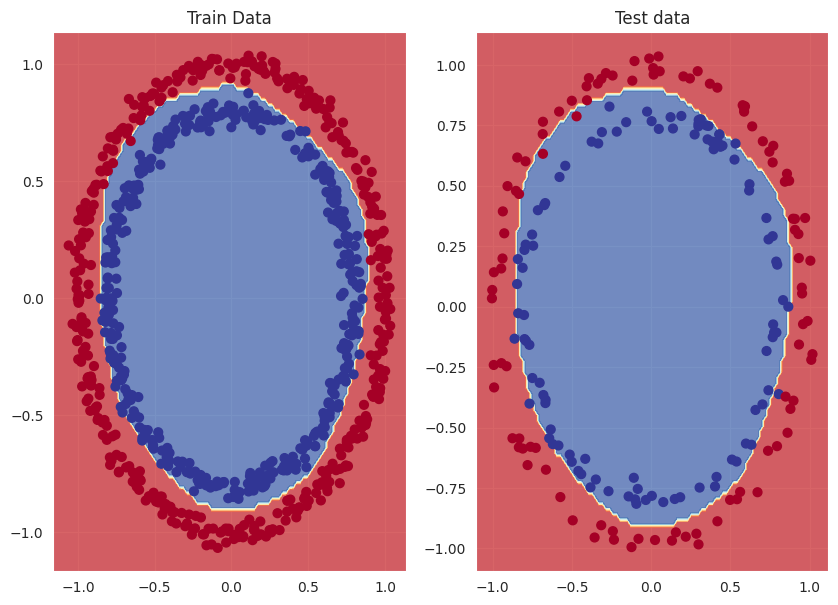

In [54]:
#Plotting the decision boundaries
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.title('Train Data')
plot_decision_boundary(model_pro, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model_pro, X_test, y_test)

**Replicating non-linear activation functions using PyTorch code**

In [55]:
#Creating a tensor
A = torch.arange(start = -10, end = 10, step = 1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

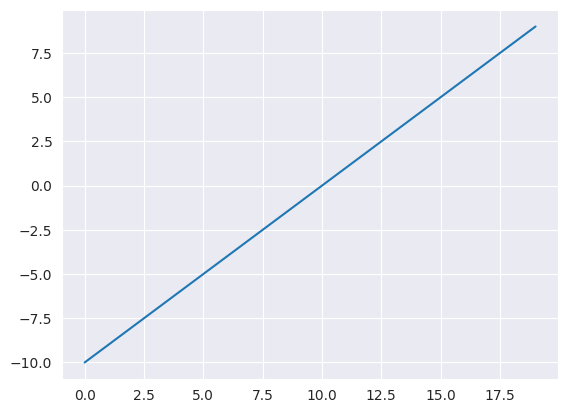

In [56]:
#Visualizing the tensor
plt.plot(A)

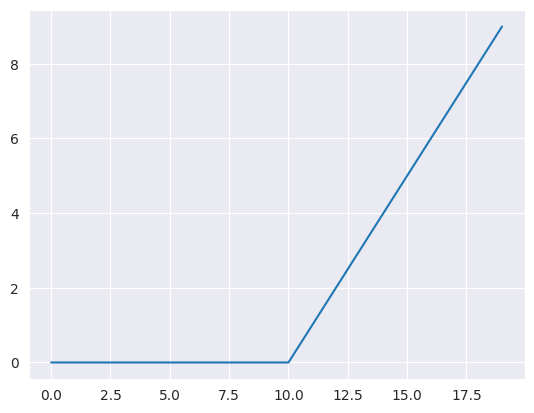

In [57]:
plt.plot(torch.relu(A))

In [58]:
#Creating relu function
#Takes tensor input and returns a tensor output
def relu(X: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), X)

In [59]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

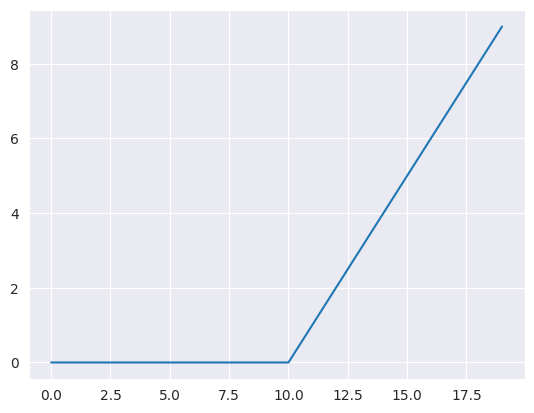

In [60]:
plt.plot(relu(A))

In [61]:
def sigmoid(X: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-X))

In [62]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

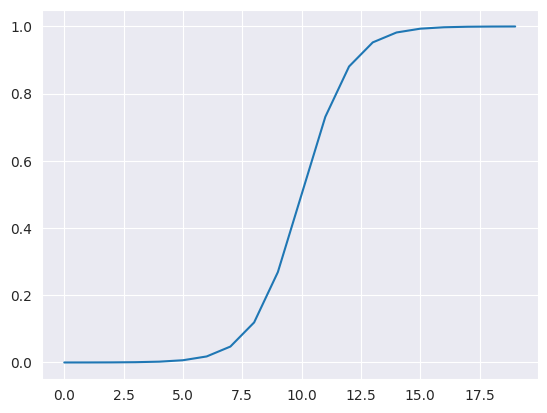

In [63]:
plt.plot(sigmoid(A))

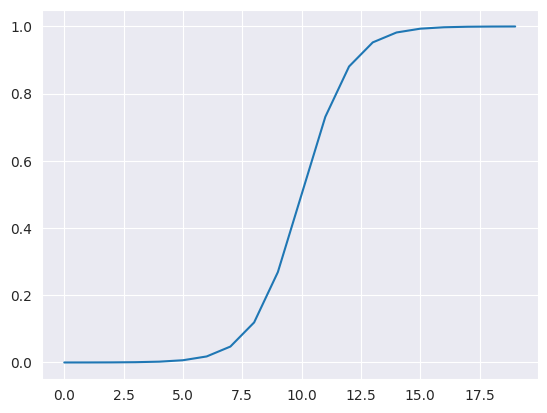

In [64]:
plt.plot(torch.sigmoid(A))

**Multiclass Classification Using PyTorch Neural Networks**

In [65]:
#Building a multiclass dataset
from sklearn.datasets import make_blobs
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42    
X, y = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, random_state = RANDOM_SEED, centers = NUM_CLASSES, cluster_std = 1.5)

**Note: `n_features` specifies the number of features in the input data (X); `centers` basically specifies the number of centers which corresponds to the number of clusters or classes**

In [66]:
#Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)

In [67]:
X_train

array([[ 5.04045424,  3.30761588],
       [-2.62485019,  9.52601409],
       [-8.52403982, -9.04018592],
       ...,
       [-1.73664472,  9.78496505],
       [-6.81390998, -7.1006126 ],
       [-9.03113402,  4.50074935]])

In [68]:
y_train

array([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2,
       3, 1, 3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3,
       3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3,
       2, 2, 2, 1, 0, 2, 3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3,
       2, 2, 1, 0, 0, 1, 2, 1, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1,
       2, 0, 3, 3, 2, 0, 2, 0, 3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3,
       2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0,
       0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1, 2, 2, 2, 3, 0, 1, 1, 0,
       1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 3, 3,
       2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 0, 0, 1,
       0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2, 0, 2,
       0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
       2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3,
       1, 0, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3, 3, 1,

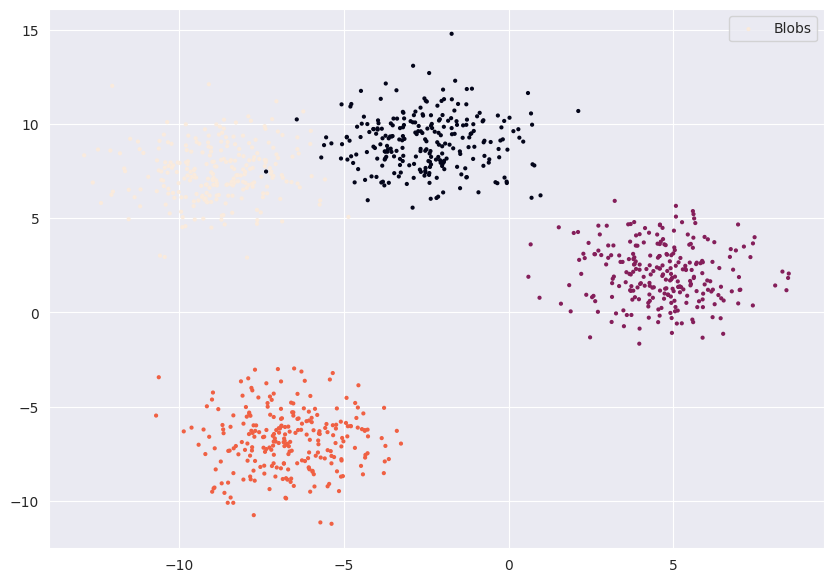

In [69]:
#Visualizing the dataset
plt.figure(figsize = (10, 7))
plt.scatter(X[: , 0], X[: , 1], s = 4, c = y, label = 'Blobs')
plt.legend()

**Creating a multiclass classifier**

In [70]:
#Making the commonly used nn layer hyperparameters as arguments of the class's constructor 
#This enables the user to customize the model to their liking
class MultiClassClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(in_features = input_features, out_features = hidden_units),
                                    nn.ReLU(),
                                    nn.Dropout(0.1),
                                    nn.Linear(in_features = hidden_units, out_features = hidden_units),
                                    nn.ReLU(),
                                    nn.Dropout(0.1),
                                    nn.Linear(in_features = hidden_units, out_features = output_features),
                                    )
    def forward(self, x):
        return self.layers(x)

In [71]:
multiclass_classifier = MultiClassClassifier(input_features = NUM_FEATURES, output_features = NUM_CLASSES, hidden_units = 64).to(device)

In [72]:
multiclass_classifier

MultiClassClassifier(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [73]:
multiclass_classifier.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[-0.5613, -0.5430],
                      [-0.5748, -0.1916],
                      [ 0.6246,  0.2764],
                      [-0.0838,  0.1455],
                      [ 0.2816,  0.0041],
                      [-0.5703, -0.4357],
                      [-0.4804, -0.0180],
                      [-0.6473, -0.1286],
                      [-0.2586,  0.6939],
                      [ 0.5748,  0.4107],
                      [ 0.0397, -0.2289],
                      [ 0.1804, -0.4886],
                      [-0.3016, -0.1420],
                      [-0.1661, -0.6698],
                      [ 0.2811,  0.5823],
                      [-0.3900,  0.1906],
                      [-0.0820, -0.0258],
                      [ 0.0412,  0.6128],
                      [ 0.0947, -0.4474],
                      [-0.2544,  0.3454],
                      [ 0.2207,  0.0137],
                      [-0.0933, -0.2751],
                      [-0.2510, -0.3730],
 

In [74]:
list(multiclass_classifier.parameters())

[Parameter containing:
 tensor([[-0.5613, -0.5430],
         [-0.5748, -0.1916],
         [ 0.6246,  0.2764],
         [-0.0838,  0.1455],
         [ 0.2816,  0.0041],
         [-0.5703, -0.4357],
         [-0.4804, -0.0180],
         [-0.6473, -0.1286],
         [-0.2586,  0.6939],
         [ 0.5748,  0.4107],
         [ 0.0397, -0.2289],
         [ 0.1804, -0.4886],
         [-0.3016, -0.1420],
         [-0.1661, -0.6698],
         [ 0.2811,  0.5823],
         [-0.3900,  0.1906],
         [-0.0820, -0.0258],
         [ 0.0412,  0.6128],
         [ 0.0947, -0.4474],
         [-0.2544,  0.3454],
         [ 0.2207,  0.0137],
         [-0.0933, -0.2751],
         [-0.2510, -0.3730],
         [ 0.1159,  0.1986],
         [ 0.5415, -0.1597],
         [ 0.0506,  0.4570],
         [ 0.3076,  0.0909],
         [ 0.2173,  0.0367],
         [-0.6066,  0.0273],
         [-0.1546,  0.6381],
         [ 0.6383,  0.1403],
         [ 0.6320, -0.3642],
         [ 0.6146,  0.6088],
         [-0.0270, -

In [75]:
#Creating a loss function and optimizer
multiclass_loss_fn = nn.CrossEntropyLoss()
multiclass_optimizer = torch.optim.SGD(params = multiclass_classifier.parameters(), lr = 0.1)

**`CrossEntropyLoss()` has `weights` parameter that can be used for imbalanced dataset where the minority class can have higher weight.**

In [76]:
#Converting the dataset to tensors and saving them on the GPU
X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.float32).to(device)
y_test = torch.from_numpy(y_test).type(torch.float32).to(device)

In [77]:
#Getting the predictions probabilities
multiclass_classifier.eval()
with torch.inference_mode():
    Logits = multiclass_classifier(X_test)

In [78]:
Logits

tensor([[ 1.2687e-01,  1.1200e-01,  5.5655e-01, -2.9093e-01],
        [ 4.1357e-01,  4.3266e-01, -2.2921e-02, -6.5552e-01],
        [ 2.0935e+00, -5.9365e-01,  4.2553e-01, -1.6120e+00],
        [ 9.3213e-02,  6.6522e-02,  3.3293e-01, -1.3407e-01],
        [ 1.3394e-01,  6.4945e-01,  1.8765e-01, -2.2791e-01],
        [ 5.5062e-01,  4.8709e-01, -2.4463e-02, -8.1772e-01],
        [ 2.0572e+00, -6.4501e-01,  2.7040e-01, -1.5417e+00],
        [ 1.7758e-01,  5.7236e-01, -2.8225e-02, -2.4748e-01],
        [ 2.3010e+00, -6.0877e-01,  5.9243e-01, -1.8551e+00],
        [ 1.4440e-01,  5.9700e-01,  4.1632e-02, -2.3882e-01],
        [ 2.1815e-01,  5.0568e-01, -1.0519e-01, -2.8850e-01],
        [ 1.6506e-01,  8.4465e-02,  6.3862e-01, -3.2432e-01],
        [ 1.4352e-01,  6.5142e-01,  1.1353e-01, -2.4152e-01],
        [ 1.9495e-01,  6.5936e-01, -6.4259e-03, -2.6442e-01],
        [ 1.9275e-01,  7.1432e-01,  2.4728e-02, -2.7406e-01],
        [ 2.8711e-01,  4.3873e-01, -6.5765e-02, -5.1873e-01],
        

In [79]:
#Applying softmax to the logits function to get probability distribution for every class
Pred_probs = torch.softmax(Logits, dim = 1)
Pred_probs

tensor([[0.2392, 0.2357, 0.3676, 0.1575],
        [0.3323, 0.3388, 0.2148, 0.1141],
        [0.7805, 0.0531, 0.1472, 0.0192],
        [0.2474, 0.2409, 0.3145, 0.1971],
        [0.2259, 0.3783, 0.2384, 0.1573],
        [0.3629, 0.3406, 0.2042, 0.0924],
        [0.7924, 0.0531, 0.1327, 0.0217],
        [0.2530, 0.3755, 0.2060, 0.1654],
        [0.7992, 0.0435, 0.1447, 0.0125],
        [0.2406, 0.3783, 0.2171, 0.1640],
        [0.2733, 0.3643, 0.1978, 0.1646],
        [0.2415, 0.2228, 0.3877, 0.1480],
        [0.2319, 0.3853, 0.2250, 0.1578],
        [0.2475, 0.3938, 0.2024, 0.1563],
        [0.2406, 0.4053, 0.2034, 0.1508],
        [0.3018, 0.3512, 0.2121, 0.1348],
        [0.3417, 0.3349, 0.2152, 0.1083],
        [0.5723, 0.1228, 0.2448, 0.0601],
        [0.3143, 0.3753, 0.1963, 0.1141],
        [0.3850, 0.2927, 0.2232, 0.0992],
        [0.2996, 0.3699, 0.1989, 0.1316],
        [0.2574, 0.3520, 0.2135, 0.1771],
        [0.2415, 0.2517, 0.2784, 0.2285],
        [0.7026, 0.0807, 0.1803, 0

#This gives the index of the highest probability for each sample
Pred_Labels = torch.argmax(Pred_probs, dim = 1)

In [80]:
y_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.], device='cuda:0')

**Building a training and test loop for multiclass classifier**

In [81]:
epochs = 100
for i in range(epochs):
    #Train mode
    multiclass_classifier.train()
    #Forward Pass
    train_logits = multiclass_classifier(X_train).squeeze()
    train_pred_probs = torch.softmax(train_logits, dim = 1)
    train_pred_labels = torch.argmax(train_pred_probs, dim = 1)
    #Train Loss
    train_loss = multiclass_loss_fn(train_logits, y_train.type(torch.long))
    #Train Acc
    train_acc = accuracy_fn(y_train, train_pred_labels)
    #Resetting optimizer
    multiclass_optimizer.zero_grad()
    #Backpropagation
    train_loss.backward()
    #Stepping the optimizer
    multiclass_optimizer.step()
    #Evaluation mode
    multiclass_classifier.eval()
    #Inference mode
    with torch.inference_mode():
        #Forward pass
        test_logits = multiclass_classifier(X_test).squeeze()
        test_pred_probs = torch.softmax(test_logits, dim = 1)
        test_pred_labels = torch.argmax(test_pred_probs, dim = 1)
        #Test Loss
        test_loss = multiclass_loss_fn(test_logits, y_test.type(torch.long))
        #Test Accuracy
        test_acc = accuracy_fn(y_test, test_pred_labels)
    print(f'Epoch: {i + 1} | Train Loss: {train_loss} | Train Accuracy: {train_acc} % | Test Loss: {test_loss} | Test Accuracy: {test_acc} %')
    

Epoch: 1 | Train Loss: 1.7642897367477417 | Train Accuracy: 5.125 % | Test Loss: 0.7502934336662292 | Test Accuracy: 62.0 %
Epoch: 2 | Train Loss: 0.8366328477859497 | Train Accuracy: 58.12500000000001 % | Test Loss: 0.4604962170124054 | Test Accuracy: 94.0 %
Epoch: 3 | Train Loss: 0.4984484612941742 | Train Accuracy: 92.0 % | Test Loss: 0.300755113363266 | Test Accuracy: 98.5 %
Epoch: 4 | Train Loss: 0.3594988286495209 | Train Accuracy: 94.375 % | Test Loss: 0.24464942514896393 | Test Accuracy: 97.0 %
Epoch: 5 | Train Loss: 0.28512290120124817 | Train Accuracy: 96.375 % | Test Loss: 0.17942678928375244 | Test Accuracy: 99.0 %
Epoch: 6 | Train Loss: 0.2280072271823883 | Train Accuracy: 97.125 % | Test Loss: 0.16160817444324493 | Test Accuracy: 98.0 %
Epoch: 7 | Train Loss: 0.19769367575645447 | Train Accuracy: 97.875 % | Test Loss: 0.12500832974910736 | Test Accuracy: 99.5 %
Epoch: 8 | Train Loss: 0.16788773238658905 | Train Accuracy: 97.875 % | Test Loss: 0.11712149530649185 | Test Ac

In [82]:
#Making predictions
multiclass_classifier.eval()
with torch.inference_mode():
    y_pred_labels = torch.softmax(multiclass_classifier(X_test).squeeze(), dim = 1).argmax(dim = 1)

In [83]:
y_pred_labels

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [84]:
y_pred_labels == y_test

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

**Note: Labels should always be of type torch.LongTensor**

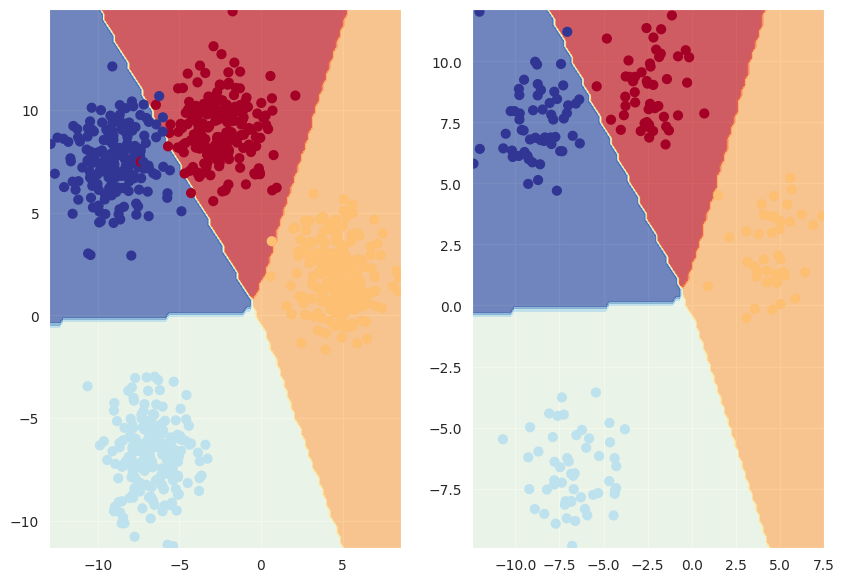

In [87]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plot_decision_boundary(multiclass_classifier, X_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(multiclass_classifier, X_test, y_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test.cpu(), y_pred_labels.cpu()))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        49
         1.0       1.00      1.00      1.00        41
         2.0       1.00      1.00      1.00        53
         3.0       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [92]:
print(confusion_matrix(y_test.cpu(), y_pred_labels.cpu()))

[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 1  0  0 56]]


**Note: Accuracy isn't good for imbalanced datasets**

**Using other evaluation metrics**

In [120]:
import torchmetrics

In [121]:
from torchmetrics import Accuracy, Precision, Recall

In [122]:
acc = Accuracy(task = 'multiclass', num_classes = NUM_CLASSES).to(device)
prec = Precision(task = 'multiclass', num_classes = NUM_CLASSES).to(device)
rec = Recall(task = 'multiclass', num_classes = NUM_CLASSES).to(device)

**torchmetrics can be loaded onto the GPU so that the computation is done there**

In [129]:
def perf_metrics(y_true, y_pred):
    Acc = acc(y_true, y_pred)
    Prec = prec(y_true, y_pred)
    Rec = rec(y_true, y_pred)
    return {'Accuracy': Acc.cpu().numpy(), 'Precision': Prec.cpu().numpy(), 'Recall': Rec.cpu().numpy()}

In [130]:
perf_metrics(y_test.type(torch.int64), y_pred_labels)

{'Accuracy': array(0.995, dtype=float32),
 'Precision': array(0.995, dtype=float32),
 'Recall': array(0.995, dtype=float32)}

In [114]:
type(y_test), type(y_pred_labels)

(torch.Tensor, torch.Tensor)

In [115]:
y_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.], device='cuda:0')

In [118]:
y_pred_labels.dtype

torch.int64

In [117]:
type(y_test.type(torch.long))

torch.Tensor